# **Explicação: Rede Neural de Reconhecimento de Pets**

Para que seja possível aplicar uma rede neural capaz de reconhecer animais que estão presente no banco de Dados, sem que haja nenhum tipo de anotação de imagem, o processo deve ser totalmente automático, a partir da implementação das imagens de cada animal que deve ser reconhecido.

É necessário portanto, de acordo com o desejado, desenvolver uma IA de One-shot Learning, que se utiliza de apenas uma foto de referência (Câmera) para reconhecer o que é desejado (Imagens no Banco de Dados).

Existe um modelo de Rede Neural Siamesa que realiza esse trabalho, o canal utilizado como referência foi: https://www.youtube.com/watch?v=bK_k7eebGgc&list=PLgNJO2hghbmhHuhURAGbe6KWpiYZt0AMH&index=1

## **Dataset**

O dataset que é utilizado para realizar o treinamento dessa Inteligência Artificial consiste em 3 tipos de conjunto de imagens: Âncora, Positiva e Negativa. Imagens âncora são as imagens principais utilizadas para fazer uma comparação entre o que é, e o que não é relativo. Seria a imagem, nesse caso, da câmera em tempo real, por exemplo. As imagens Positivas, são aquelas que possuem relação com a Âncora, enquanto as negativas, não possuem.

## **Arquitetura**

O modelo tem uma arquitetura de Rede Neural Siamesa, onde ela é composta por duas redes neurais similares, em que recebem entradas diferentes (Imagens Âncoras e imagens Positivas ou Negativas), gerando uma saída representando a similaridade dessas duas imagens.

# **1 - Importando Bibliotecas e Dependências**

## 1.1 Bibliotecas Gerais

In [ ]:
# Bibliotecas principais
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt
import random as rn
import pandas as pd
# Abrir Imagens
from PIL import Image
# IDs
import uuid
# biblioteca de copia de arquivos
import shutil
# Biblioteca de utilização do drive
from google.colab import drive
# biblioteca de nomes aleatórios
import uuid

from IPython.display import clear_output

from glob import glob

## 1.2 Bibliotecas do Tensorflow (Funções de Redes Neurais Artificiais)

In [ ]:
# Dependências do TensorFlow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten, Dropout

import tensorflow as tf

## 1.3 Importando Dataset Negativo

In [ ]:
!pip install datasets
# Importando o Dataset de Cats VS Dogs
from datasets import load_dataset, DatasetDict
# Carregando o dataset
dataset = load_dataset("cats_vs_dogs")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/8.16k [00:00<?, ?B/s]

KeyboardInterrupt: 

# **2 - Dataset**

## 2.1 Estrutura do Dataset

In [ ]:
# Importando o Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Configurando as Pastas (Dentro da Pasta do drive)
DATASET_PATH = '/content/drive/My Drive/TCC_rakel+Artur/Dataset_2'
POS_PATH = os.path.join(DATASET_PATH, 'positive')
NEG_PATH = os.path.join(DATASET_PATH, 'negative')
ANC_PATH = os.path.join(DATASET_PATH, 'anchor')
print('\n' + ANC_PATH, '\n' + NEG_PATH, '\n' + POS_PATH)


/content/drive/My Drive/TCC_rakel+Artur/Dataset_2/anchor 
/content/drive/My Drive/TCC_rakel+Artur/Dataset_2/negative 
/content/drive/My Drive/TCC_rakel+Artur/Dataset_2/positive


In [ ]:
# Criando as pastas dos diretórios criados
# os.makedirs(POS_PATH, exist_ok=True)
# os.makedirs(NEG_PATH, exist_ok=True)
# os.makedirs(ANC_PATH, exist_ok=True)

In [ ]:
# Adicionando as imagens negativas ao caminho do Drive
print(dataset)

NameError: name 'dataset' is not defined

## 2.2 Passando todas as imagens de Cachorro do Dataset de cat_and_dogs

1


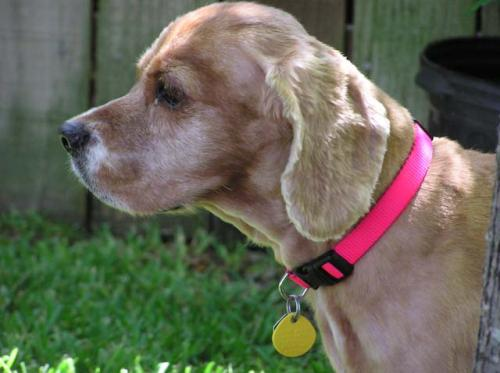

In [ ]:
# Visualizando as imagens no Dataset
# As imagens Intituladas '0' são imagens de Gatos
# enquanto as imagens Intituladas '1' são de Cachorros

exemplo = dataset['train'][random.randint(0, len(dataset['train']))]
image = exemplo['image']
label = exemplo['labels']
print(label)
display(image)

In [ ]:
# Filtra apenas os exemplos onde 'labels' é igual a 1 (cachorros)
dogs_dataset = dataset["train"].filter(lambda cachorros: cachorros["labels"] == 1)
print(f"Número de imagens de cachorros: {len(dogs_dataset)}")

Filter:   0%|          | 0/23410 [00:00<?, ? examples/s]

Número de imagens de cachorros: 11669


In [ ]:
# Caminho no Google Drive onde as imagens serão salvas
output_dir = DATASET_PATH + '/negative'

# Itera sobre os primeiros 1000 exemplos do dataset filtrado
for idx, example in enumerate(dogs_dataset):
    if idx >= 1000:  # Limita a 1000 imagens
        break
    image = example["image"]  # Obtém a imagem no formato PIL
    unique_name = f"{uuid.uuid4()}.jpg"  # Gera um nome único para a imagem
    output_path = os.path.join(output_dir, unique_name)  # Define o caminho de salvamento
    image.save(output_path)  # Salva a imagem como arquivo JPG

    if idx % 100 == 0:  # Exibe progresso a cada 100 imagens
        print(f"{idx} imagens salvas.")

print("As 10000 imagens foram salvas no Google Drive!")

0 imagens salvas.
100 imagens salvas.
200 imagens salvas.
300 imagens salvas.
400 imagens salvas.
500 imagens salvas.
600 imagens salvas.
700 imagens salvas.
800 imagens salvas.
900 imagens salvas.
As 10000 imagens foram salvas no Google Drive!


In [ ]:
# Diminuido o tmanho da imagem para 250x250 e randomizando o nome
output_path = DATASET_PATH + '/negative'

def random_250 (output_path):
  # Processa todas as imagens no diretório
  for image_name in os.listdir(output_path):
      # Caminho completo da imagem
      image_path = os.path.join(output_path, image_name)

      # Verifica se o arquivo é uma imagem válida
      if image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
          try:
              # Abre a imagem
              image = Image.open(image_path)

              # Redimensiona para 250x250 pixels
              resized_image = image.resize((250, 250))

              # Gera um nome único para a imagem
              unique_name = f"{uuid.uuid4()}.jpg"

              # Caminho para salvar a imagem com o novo nome (no mesmo diretório)
              new_image_path = os.path.join(output_path, unique_name)

              # Salva a imagem redimensionada e renomeada
              resized_image.save(new_image_path)

              # Remove a imagem original
              os.remove(image_path)

          except Exception as e:
              print(f"Erro ao processar a imagem {image_name}: {e}")

  print("As imagens foram renomeadas e redimensionadas no mesmo diretório!")

In [ ]:
random_250(output_path)

As imagens foram renomeadas e redimensionadas no mesmo diretório!


## 2.3 Importando Fotos de Cachorros Individuais

Importamos as fotos utilizando o link com o dataset estruturado por cachorros individuais: https://www.kaggle.com/datasets/rasty90/individual-dogs-dataset?resource=download


In [ ]:
# Modificando o nome e o tamanho da imagem para 250x250 px
output_path = DATASET_PATH + '/positive'

random_250(output_path)

As imagens foram renomeadas e redimensionadas no mesmo diretório!


## 2.4 Movendo metade das fotos positivas para âncora (Não Ideal)

In [ ]:
# Diretório original (contém todas as imagens)
source_dir = DATASET_PATH + '/positive'

# Diretório de destino (onde metade das imagens será movida)
destination_dir = DATASET_PATH + '/anchor'

In [ ]:
def move_half(source_dir, destination_dir):
  # Lista todas as imagens no diretório original
  image_files = [f for f in os.listdir(source_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

  # Embaralha a lista para seleção aleatória
  random.shuffle(image_files)

  # Calcula a metade do número total de imagens
  half_size = len(image_files) // 2

  # Seleciona metade das imagens para mover
  images_to_move = image_files[:half_size]

  # Move as imagens selecionadas
  for image_name in images_to_move:
      source_path = os.path.join(source_dir, image_name)  # Caminho de origem
      destination_path = os.path.join(destination_dir, image_name)  # Caminho de destino
      shutil.move(source_path, destination_path)  # Move a imagem

  print(f"{len(images_to_move)} imagens foram movidas para {destination_dir}.")

In [ ]:
move_half(source_dir, destination_dir)

38 imagens foram movidas para /content/drive/My Drive/TCC_rakel+Artur/Dataset_2/anchor.


# **3 - Pré-Processamento de Imagens**

In [ ]:
def augment_image(input_dir, output_dir):
    # Lista todas as imagens na pasta de entrada
    image_paths = glob(os.path.join(input_dir, '*.jpg'))  # ou .png, .jpeg, etc.

    for i, img_path in enumerate(image_paths):
        # Carrega a imagem
        image = Image.open(img_path)

        # Aumentação de dados:
        image = tf.image.random_flip_left_right(image)         # Flip horizontal
        image = tf.image.random_brightness(image, max_delta=0.1) # Brilho
        image = tf.image.random_contrast(image, lower=0.8, upper=1.2) # Contraste
        image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)) # Rotação aleatória

        # Converte para array numpy e escala para valores entre 0 e 255
        image = (image.numpy() * 255).astype('uint8')
        image = Image.fromarray(image)

        # Gera um nome de arquivo único com UUID
        unique_filename = f"augmented_{uuid.uuid4().hex}.jpg"

        # Salva a imagem aumentada no diretório de saída
        image.save(os.path.join(output_dir, unique_filename))

        print(f'Imagem {i + 1}/{len(image_paths)} processada e salva como {unique_filename}.')

In [ ]:
augment_image(POS_PATH, POS_PATH)
augment_image(ANC_PATH, ANC_PATH)

Imagem 1/38 processada e salva como augmented_35ab4fdc7e02426488048dde92486c67.jpg.
Imagem 2/38 processada e salva como augmented_645af871288245ed86f14479e458af97.jpg.
Imagem 3/38 processada e salva como augmented_3ad94e7c34c64697a47f6ce28d6d7b28.jpg.
Imagem 4/38 processada e salva como augmented_606832c2fdd6403b9b13ad8996f505fe.jpg.
Imagem 5/38 processada e salva como augmented_1aeadfae33b247e08e556c9be72f9605.jpg.
Imagem 6/38 processada e salva como augmented_a1ed519011764c4b9d9c7341babb30ca.jpg.
Imagem 7/38 processada e salva como augmented_063ae61b4a0b4710a1faa7d39b30418e.jpg.
Imagem 8/38 processada e salva como augmented_6fb7b25daee34522897603dd4c72b2e0.jpg.
Imagem 9/38 processada e salva como augmented_f9917ba6548440ba839bcce61f059341.jpg.
Imagem 10/38 processada e salva como augmented_328b269723774b41af121ecc3e374a69.jpg.
Imagem 11/38 processada e salva como augmented_562e9067e5ca44db8f9e0874eb98e655.jpg.
Imagem 12/38 processada e salva como augmented_0a51794a421a42cdbeca19ee250

## 3.1 Carregando Diretório de Imagens

In [ ]:
# Definindo o caminho para cada imagem dos diretórios específicos
anchor = tf.data.Dataset.list_files(ANC_PATH+'/*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'/*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'/*.jpg').take(300)

In [ ]:
dir_test = anchor.as_numpy_iterator()

In [ ]:
print(dir_test.next())

b'/content/drive/My Drive/TCC_rakel+Artur/Dataset_2/anchor/7e990ad1-162b-4aa3-95aa-45bd850ed23e.jpg'


## 3.2 Pré-Processando

In [ ]:
def preprocess (file_path):
  # Lê a imagem
  byte_img = tf.io.read_file(file_path)
  # Carrega a imagem como JPEG
  img = tf.io.decode_jpeg(byte_img)
  # Modifica o tamanho da imagem em 100x100x3(RGB) - Especificado pelo artigo RN Siamesa
  img = tf.image.resize(img, (100,100))
  # Escala as informações da imagem para estarem entre 0 e 1
  img = img / 255.0
  return img

## 3.3 Rotulando o Dataset

O que queremos é criar algo que contenha a informação de que, em uma comparação entre duas imagens, elas são ou não compatíveis, e qual o caminho de acesso para essas imagens. Iremos estruturar da forma: **(caminho_ancora, caminho_pos_ou_neg, compatibilidade)**.

Especificamente, comparações entre ancoras e positivos terão compatibilidade, ou seja, carregará o valor 1, caso for comparado com imagens negativas, valor 0.

In [ ]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [ ]:
samples = data.as_numpy_iterator()

In [ ]:
samples.next()

(b'/content/drive/My Drive/TCC_rakel+Artur/Dataset_2/anchor/17acb5de-bd59-4aa7-9383-869a6db4b61f.jpg',
 b'/content/drive/My Drive/TCC_rakel+Artur/Dataset_2/positive/e6b9f485-268f-4f25-9552-8b34517271ee.jpg',
 np.float32(1.0))

## 3.4 Dividindo o Dataset em Treino Teste e Validação

In [ ]:
# Realiza o pré-processamento de dados dentro do Dataset estruturado
def preprocess_twin(input_img, validation_img, label):
  return(preprocess(input_img), preprocess(validation_img), label)

In [ ]:
# Dataloader Pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [ ]:
samples = data.as_numpy_iterator()

In [ ]:
samples = samples.next()
samples

(array([[[0.17867647, 0.14558823, 0.10588235],
         [0.5808824 , 0.5651961 , 0.52205884],
         [0.84313726, 0.84313726, 0.797549  ],
         ...,
         [0.6112745 , 0.6230392 , 0.50147057],
         [0.38406864, 0.39583334, 0.2742647 ],
         [0.40588236, 0.41764706, 0.29607844]],
 
        [[0.20857844, 0.18039216, 0.11838235],
         [0.42352942, 0.4117647 , 0.3509804 ],
         [0.90931374, 0.9132353 , 0.8544118 ],
         ...,
         [0.4595588 , 0.47132352, 0.3497549 ],
         [0.45416668, 0.4659314 , 0.34436274],
         [0.7151961 , 0.7269608 , 0.60539216]],
 
        [[0.20294118, 0.1754902 , 0.10196079],
         [0.27107844, 0.2622549 , 0.18186274],
         [0.8882353 , 0.89509803, 0.8156863 ],
         ...,
         [0.5110294 , 0.5227941 , 0.40122548],
         [0.48431373, 0.49607843, 0.3745098 ],
         [0.6970588 , 0.7088235 , 0.5872549 ]],
 
        ...,
 
        [[0.75759804, 0.7585784 , 0.7477941 ],
         [0.8186275 , 0.81960785, 0.80882

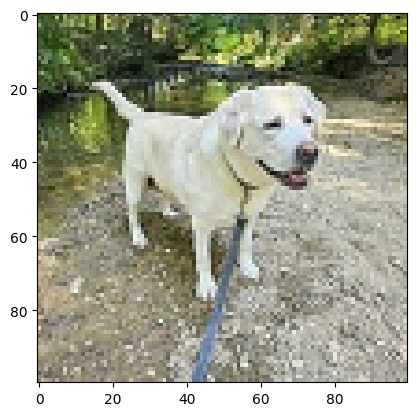

In [ ]:
plt.imshow(samples[0])

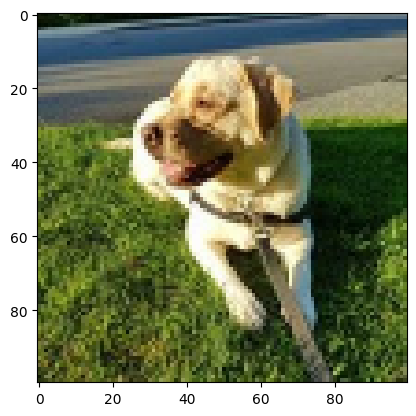

In [ ]:
plt.imshow(samples[1])

In [ ]:
# Criando as repartições
# A repartição de treinamento será 70% do tamanho do dataset original
# e também será dividida em batchs de 16

train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [ ]:
# Agora temos a repartição de treino que possui batchs de 16 dados,
# identificado no primeiro shape ou dimensão do dado.

train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [ ]:
# Repartição de Teste
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# **4 - Construção do Modelo**

## 4.1 Camada de Embedding

In [ ]:
def make_embedding():
  inp = Input(shape=(100,100,3), name='input_image')

  # Primeiro Bloco

  # 1º Camada: Convolução de 64 filtros, de uma matriz convolução de 10x10, usando a função ReLU
  # (inp) -> faz a conexão da camada em questão com a rede neural
  c1 = Conv2D(64, (10,10), activation='relu')(inp)
  # 2º Camada: Convolução de 128
  m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
  # 3º Camada: Dropout de 30% para evitar overfitting
  dp1 = Dropout(0.3)(m1)

  # Segundo Bloco

  # 4º Camada:
  c2 = Conv2D(128, (7,7), activation='relu')(m1)
  # 5º Camada:
  m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
  # 6º Camada:
  dp2 = Dropout(0.3)(m2)

  # Terceiro Bloco

  # 7º Camada:
  c3 = Conv2D(128, (4,4), activation='relu')(m2)
  # 8º Camada:
  m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
  # 9º Camada:
  dp3 = Dropout(0.3)(m3)

  # Quarto Bloco

  # 10º Camada:
  c4 = Conv2D(256, (4,4), activation='relu')(m3)
  # Tranforma as informações em um vetor
  f1 = Flatten()(c4)
  # Transforma o vetor em uma ´´unica saída

  d1 = Dense(4096, activation='sigmoid')(f1)

  return Model(inputs=inp, outputs=d1, name='embedding')

In [ ]:
embedding = make_embedding()

In [ ]:
embedding.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)             │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 91, 91, 64)          │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 46, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 40, 40, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 17, 17, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 256)           │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

## 4.2 Camada de Distância

In [ ]:
# Estaremos criando basicamente, uma camada da Rede Neural customizada, que calcula os resultados obtidos pela rede Siamesa
class L1Dist(Layer):
  # Inicia a classe
  def __init__(self, **kwargs):
    super().__init__()

  # Realiza o calculo da distância
  def call(self, inputs):
     input_embedding, validation_embedding = inputs
     return tf.math.abs(input_embedding - validation_embedding)

In [ ]:
l1 = L1Dist()

## 4.5 Cria o Modelo Siamês

In [ ]:
def make_siamese_model():

  # Imagem âncora de Entrada
  input_image = Input(name='input_img', shape=(100,100,3))
  # Imagem de validação de Entrada
  validation_image = Input(name='validation_img', shape=(100,100,3))

  # Combinando os componentes de Distância da rede Siamesa
  siamese_layer = L1Dist()
  siamese_layer._name = 'distance'
  distances = siamese_layer([embedding(input_image), embedding(validation_image)])

  # Camada de Classificação
  classifier = Dense(1, activation='sigmoid')(distances)

  return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [ ]:
siamese_network = make_siamese_model()
siamese_network.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)    │ (None, 100, 100, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ validation_img            │ (None, 100, 100, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Functional)    │ (None, 4096)           │     38,960,448 │ input_img[0][0],       │
│                           │                        │                │ validation_img[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ l1_dist (L1Dist)          │ (None, 4096)           │              0 │ embedding[0][0],       │
│                           │                        │                │ embedding[1][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │          4,097 │ l1_dist[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

# **5 - Treinamento**

## 5.1 Configurando a Função de Perda e o Otimizador

In [ ]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [ ]:
opt = tf.keras.optimizers.Adam(1e-5) # Learning Rate de 0.00001

## 5.2 Definindo Checkpoints

In [ ]:
checkpoint_dir = DATASET_PATH +  '/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')

# Cria a pasta
# os.makedirs(checkpoint_dir, exist_ok=True)
# define o Checkpoint
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_network)

## 5.3 Definindo a função de passo em treino

In [ ]:
@tf.function # compila o treino da rede neural como um Gráfico Tensorflow
def train_step(batch):
    # Anota todas as operações diferenciais
    with tf.GradientTape() as tape:

      # Pega a ancora e a imagem positiva/negativa
      x = batch[:2]
      # Pega o título (Label)
      y = batch[2]

      # Viagem Frontal
      yhat = siamese_network(x, training = True)

      # Calcula a perda
      loss = binary_cross_loss(y, yhat)

    # Calcula os Gradientes
    grad = tape.gradient(loss, siamese_network.trainable_variables)

    # Calcula pesos atualizados e aplica ao modelo de rede siamesa
    opt.apply_gradients(zip(grad, siamese_network.trainable_variables))

    return loss


## 5.3 Construindo o Loop de Treinamento

In [ ]:
import matplotlib.pyplot as plt

def train(train_data, val_data, epochs):
    train_losses = []
    val_losses = []

    for epoch in range(1, epochs + 1):
        print(f'\n Epoch {epoch}/{epochs}')
        progbar = tf.keras.utils.Progbar(len(train_data))

        epoch_loss = 0
        # Loop para os dados de treino
        for idx, batch in enumerate(train_data):
            loss = train_step(batch)
            epoch_loss += loss
            progbar.update(idx + 1)

        # Média da perda de treino por época
        epoch_loss /= len(train_data)
        train_losses.append(epoch_loss)

        # Calcula a perda nos dados de validação
        val_loss = 0
        for batch in val_data:
            x = batch[:2]
            y = batch[2]
            yhat = siamese_network(x, training=False)
            val_loss += binary_cross_loss(y, yhat)

        # Média da perda de validação por época
        val_loss /= len(val_data)
        val_losses.append(val_loss)

        # Salva checkpoints a cada 10 épocas (opcional)
        if epoch % 10 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

    # Plotando os gráficos de perda
    plt.figure(figsize=(8, 6))
    plt.plot(train_losses, label='Training Loss', marker='o', color='blue')
    plt.plot(val_losses, label='Validation Loss', marker='o', color='red')
    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()


## 5.4 Treina o Modelo

In [ ]:
EPOCHS = 64

In [ ]:
loss = None
loss = train(train_data, test_data, EPOCHS)


 Epoch 1/64


KeyboardInterrupt: 

# **6 - Avaliação do Modelo**

## 6.1 Importando Metricas

In [ ]:
from tensorflow.keras.metrics import Precision, Recall

## 6.2 Acessando os dados de Batch

In [ ]:
loss.shape

TensorShape([])

In [ ]:
# Acessa um Batch dos dados de Teste
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [ ]:
test_data.as_numpy_iterator()

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7992dc7cd210>)

In [ ]:
# Realiza predições
y_hat = siamese_network.predict([test_input, test_val])
y_hat

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[5.57277235e-06],
       [2.30983105e-07],
       [9.99999166e-01],
       [9.99998808e-01],
       [1.01049809e-05],
       [9.99994636e-01],
       [1.52603316e-05],
       [9.99992013e-01],
       [1.47373385e-05],
       [9.99995112e-01],
       [1.00000000e+00],
       [1.30595913e-06],
       [9.99994397e-01],
       [1.06052812e-06],
       [9.99999881e-01],
       [9.99999762e-01]], dtype=float32)

In [ ]:
# Processando os resultados
[1 if prediction > 0.5 else 0 for prediction in y_hat]

[0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1]

## 6.3 Calculando métricas

In [ ]:
m = Recall()
m.update_state(y_true, y_hat)
m.result().numpy()

np.float32(1.0)

## 6.4 Visualizar resultados

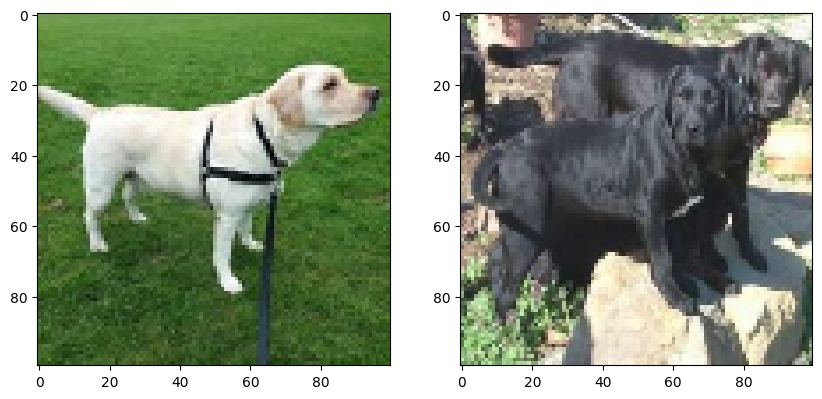

In [ ]:
plt.figure(figsize=(10,8))

# Primeiro subplot
plt.subplot(1,2,1)
plt.imshow(test_input[1])

# Segundo
plt.subplot(1,2,2)
plt.imshow(test_val[1])

# Mostra a figura
plt.show()

# **7  - Guardando o Modelo Criado**

In [ ]:
DATASET_PATH = '/content/drive/My Drive/TCC_rakel+Artur/Dataset_2'
MODELS_PATH = DATASET_PATH + '/models'

# os.makedirs(MODELS_PATH, exist_ok=True)

In [ ]:
siamese_network.save(MODELS_PATH + '/siamese_model_6.h5')

In [ ]:
# Recarrega o Modelo:
model = tf.keras.models.load_model(MODELS_PATH + '/siamese_model_6.h5',
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

DATASET_PATH = '/content/drive/My Drive/TCC_rakel+Artur/Dataset_2'


# **8 - Teste em tempo Real**

## 7.1 Função de Verificação

In [ ]:
def detectar_cachorro(detection_threshold, verification_threshold, ANCHOR_PATH, POSITIVES_PATH, model):
    results = {}
    cachorros_encontrados = []

    # Caminhos das imagens âncoras
    anchor_images = [
        os.path.join('media', ANCHOR_PATH, 'input_image1.jpg'),
        os.path.join('media', ANCHOR_PATH, 'input_image2.jpg'),
        os.path.join('media', ANCHOR_PATH, 'input_image3.jpg')
    ]

    # Verifica se todas as imagens âncoras existem
    for anchor_image_path in anchor_images:
        if not os.path.exists(anchor_image_path):
            raise FileNotFoundError(f"Imagem âncora não encontrada: {anchor_image_path}")

    # Pré-processa as imagens âncoras
    input_imgs = {f"input_image{i+1}": preprocess(img) for i, img in enumerate(anchor_images)}

    # Percorre as pastas dos cachorros para comparação
    for cachorro_nome in os.listdir(os.path.join('media', POSITIVES_PATH)):
        cachorro_path = os.path.join('media', POSITIVES_PATH, cachorro_nome)

        if not os.path.isdir(cachorro_path):
            continue

        for image in os.listdir(cachorro_path):
            validation_image_path = os.path.join(cachorro_path, image)
            validation_image = preprocess(validation_image_path)

            for anchor_name, input_img in input_imgs.items():
                # Nome da comparação como chave do dicionário
                comparison_key = f"{anchor_name}x{cachorro_nome}"

                # Faz a predição usando a IA
                result = model.predict(list(np.expand_dims([input_img, validation_image], axis=1)))

                # Adiciona o resultado ao dicionário
                if comparison_key not in results:
                    results[comparison_key] = []
                results[comparison_key].append(result)

                # Verifica se o resultado atinge o threshold
                if np.sum(np.array(result) > detection_threshold) > 0 and cachorro_nome not in cachorros_encontrados:
                    cachorros_encontrados.append(cachorro_nome)

    # Cálculo da verificação baseado na quantidade total de predições
    total_results = sum(len(v) for v in results.values())
    detection = sum(np.sum(np.array(v) > detection_threshold) for v in results.values())
    verification = detection / total_results if total_results > 0 else 0
    verified = verification > verification_threshold

    return verified, cachorros_encontrados, results


In [ ]:
list(np.expand_dims([input_img, validation_image], axis=1))

[array([1]), array([1])]

In [ ]:
!ls '/content/drive/My Drive/TCC_rakel+Artur/Dataset/application_data/input_image/'

input_image.jpg


In [ ]:
verification, cachorros, results = detectar_cachorro(0.5, 0.5, os.path.join(DATASET_PATH, 'application_data', 'input_image'), os.path.join(DATASET_PATH, 'application_data', 'verification_images'), model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━

In [ ]:
results

{'input_image1xdog1': [array([[0.0009284]], dtype=float32),
  array([[0.23732765]], dtype=float32),
  array([[0.94303536]], dtype=float32),
  array([[0.01923426]], dtype=float32),
  array([[0.9698297]], dtype=float32),
  array([[0.78137434]], dtype=float32),
  array([[0.99744886]], dtype=float32),
  array([[0.04267871]], dtype=float32),
  array([[0.44322807]], dtype=float32)],
 'input_image2xdog1': [array([[0.18066974]], dtype=float32),
  array([[0.68081915]], dtype=float32),
  array([[0.8982889]], dtype=float32),
  array([[0.73790133]], dtype=float32),
  array([[0.9757651]], dtype=float32),
  array([[0.552398]], dtype=float32),
  array([[0.23716016]], dtype=float32),
  array([[0.93874127]], dtype=float32),
  array([[0.47252762]], dtype=float32)],
 'input_image3xdog1': [array([[0.00529903]], dtype=float32),
  array([[0.10876371]], dtype=float32),
  array([[0.8665363]], dtype=float32),
  array([[0.26382744]], dtype=float32),
  array([[0.9265053]], dtype=float32),
  array([[0.5836166]], 

In [ ]:
# Função para separar os resultados em 9 listas e extrair os valores numéricos simples
def separate_and_extract_values(results):
    # Dicionário para armazenar as listas separadas
    separated_lists = {
        'input_image1xdog1': [],
        'input_image2xdog1': [],
        'input_image3xdog1': [],
        'input_image1xdog2': [],
        'input_image2xdog2': [],
        'input_image3xdog2': [],
        'input_image1xdog3': [],
        'input_image2xdog3': [],
        'input_image3xdog3': []
    }

    # Preencher as listas separadas e extrair os valores numéricos simples
    for key, value in results.items():
        # Extrair apenas os valores numéricos simples
        separated_lists[key] = [item.item() for item in value]  # item() converte np.float32 para float

    return separated_lists

# Separando os resultados e extraindo os valores numéricos simples
separated_results = separate_and_extract_values(results)

# Exibindo as listas separadas com os valores numéricos simples
for key, value in separated_results.items():
    print(f"{key}: {value}\n")


input_image1xdog1: [0.0009284016559831798, 0.23732765018939972, 0.943035364151001, 0.01923425868153572, 0.9698296785354614, 0.7813743352890015, 0.9974488615989685, 0.04267871007323265, 0.4432280659675598]

input_image2xdog1: [0.18066973984241486, 0.6808191537857056, 0.898288905620575, 0.7379013299942017, 0.9757651090621948, 0.5523980259895325, 0.23716016113758087, 0.9387412667274475, 0.4725276231765747]

input_image3xdog1: [0.005299026146531105, 0.10876370966434479, 0.8665363192558289, 0.26382744312286377, 0.9265053272247314, 0.5836166143417358, 0.9278945922851562, 0.7520937919616699, 0.23791831731796265]

input_image1xdog2: [0.12101518362760544, 0.06128598377108574, 0.03022949956357479, 0.0003536150325089693, 0.00252344086766243, 0.004909531679004431, 0.9334463477134705, 0.027805287390947342, 0.8365804553031921, 0.03853459283709526, 0.006599674466997385, 0.000180834875209257]

input_image2xdog2: [0.2862497866153717, 0.4679998457431793, 0.6404196619987488, 0.30721086263656616, 0.044266

In [ ]:
# Função para extrair o número presente no nome da imagem e do cachorro
def extrair_numero(nome_chave):
    # O nome possui o formato "input_image{num1}xdog{num2}"
    import re
    padrao = r'input_image(\d+)xdog(\d+)'
    match = re.search(padrao, nome_chave)
    if match:
        num_input = match.group(1)
        num_dog = match.group(2)
        return int(num_input), int(num_dog)
    else:
        raise ValueError(f"Formato de chave não reconhecido: {nome_chave}")

# Inicializando os contadores da matriz de confusão
TP = FN = FP = TN = 0

# Limiar para decisão
limiar = 0.5

# Processamento para cada chave do dicionário
for chave, valores in separated_results.items():
    num_input, num_dog = extrair_numero(chave)
    # Se os números forem iguais, o rótulo verdadeiro é 1 (positivo); caso contrário, 0 (negativo)
    rotulo_verdadeiro = 1 if num_input == num_dog else 0

    # Para cada valor da lista, aplica a decisão e atualiza os contadores
    for valor in valores:
        # Predição com base no limiar
        predicao = 1 if valor >= limiar else 0

        if rotulo_verdadeiro == 1:
            if predicao == 1:
                TP += 1
            else:
                FN += 1
        else:
            if predicao == 1:
                FP += 1
            else:
                TN += 1

# Impressão dos resultados
print("Matriz de Confusão:")
print(f"Verdadeiros Positivos (TP): {TP}")
print(f"Falsos Negativos (FN): {FN}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Verdadeiros Negativos (TN): {TN}")

# Caso deseje visualizar em formato de tabela:
import pandas as pd

matriz_confusao = pd.DataFrame({
    "Predito = 1": [TP, FP],
    "Predito = 0": [FN, TN]
}, index=["Real = 1", "Real = 0"])

print("\nTabela da Matriz de Confusão:")
print(matriz_confusao)

Matriz de Confusão:
Verdadeiros Positivos (TP): 15
Falsos Negativos (FN): 34
Falsos Positivos (FP): 41
Verdadeiros Negativos (TN): 57

Tabela da Matriz de Confusão:
          Predito = 1  Predito = 0
Real = 1           15           34
Real = 0           41           57


In [ ]:
# Cálculo das métricas
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
accuracy = (TP + TN) / (TP + FP + FN + TN) if (TP + FP + FN + TN) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Exibir os resultados
print("\nMétricas de Avaliação:")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1_score:.4f}")


Métricas de Avaliação:
Recall: 0.3061
Precision: 0.2679
Accuracy: 0.4898
F1-Score: 0.2857


De acordo com os resultados obtidos, provavelmente é necessária mais imagens de treinamento, tendo em mente que foram utilizados apens 50 imagens âncoras para treinamento. Talvez uma implementação RPA utilizando a página do Flickr seria eficiente na aquisição de imagens de cachorros específicos. Devido ao tempo limitado de produção de todo o projeto de TCC, a aquisição de imagens de cachorros foi limitada.

# **9 - Convertendo para tensorflow Lite**

In [ ]:
# Converter para o formato TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

model_path = os.path.join(MODELS_PATH, 'siamese_model_lite_2.tflite')
with open(model_path, 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpxr48yxug'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): List[TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name='input_img'), TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name='validation_img')]
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134928026066032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134928026072016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134928026070256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134928026069200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134928026073600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134928026069904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134928026073776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134928026074128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134928026074480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1

In [ ]:
print(MODELS_PATH)
type(siamese_network)

/content/drive/My Drive/TCC_rakel+Artur/Dataset/models


keras.src.models.functional.Functional

In [ ]:
!xxd -i "/content/drive/My Drive/TCC_rakel+Artur/Dataset/models/siamese_model_lite_2.tflite" > model2.h

Depois, faça o download do modelo que está salvo no próprio colab, manualmente.

# **10 - Detecção de Pet específico** #

# **X - Gerenciamento de GPU**

# X.1 - Consumo de GPU Crescente
Teremos que usar o máximo de GPU para diminuir o tempo de processamento das imagens.

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
len(gpus)

1

# **RPA - Aquisição de Dados comFlickr**
